In [1]:
# Importing the required libraries
# Note %matplotlib inline works only for ipython notebook. It will not work for PyCharm. It is used to show the plot distributions
# Make sure to put %matplotlib inline as the first line of code when visualising plots. Also in pyCharm IDE use plt.show() to see the plot
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Loading the data
gapURL='https://raw.githubusercontent.com/duttashi/Data-Analysis-Visualization/master/gapminder.csv'
data=pd.read_csv(gapURL)

In [3]:
# setting variables that you will be working with to numeric
data['breastcancerper100th']= data['breastcancerper100th'].convert_objects(convert_numeric=True)
data['femaleemployrate']= data['femaleemployrate'].convert_objects(convert_numeric=True)
data['alcconsumption']= data['alcconsumption'].convert_objects(convert_numeric=True)
# shows the number of rows and columns
print (len(data)) 
print (len(data.columns))
print (len(data.index))

213
16
213


In [4]:
# Print the column headers/headings
names=data.columns.values
print names
# using the describe function to get the standard deviation and other descriptive statistics of our variables
desc1=data['breastcancerper100th'].describe()
desc2=data['femaleemployrate'].describe()
desc3=data['alcconsumption'].describe()
print "\nBreast Cancer per 100th person\n", desc1
print "\nfemale employ rate\n", desc2
print "\nAlcohol consumption in litres\n", desc3

['country' 'incomeperperson' 'alcconsumption' 'armedforcesrate'
 'breastcancerper100th' 'co2emissions' 'femaleemployrate' 'hivrate'
 'internetuserate' 'lifeexpectancy' 'oilperperson' 'polityscore'
 'relectricperperson' 'suicideper100th' 'employrate' 'urbanrate']

Breast Cancer per 100th person
count    173.000000
mean      37.402890
std       22.697901
min        3.900000
25%       20.600000
50%       30.000000
75%       50.300000
max      101.100000
Name: breastcancerper100th, dtype: float64

female employ rate
count    178.000000
mean      47.549438
std       14.625743
min       11.300000
25%       38.725000
50%       47.549999
75%       55.875000
max       83.300003
Name: femaleemployrate, dtype: float64

Alcohol consumption in litres
count    187.000000
mean       6.689412
std        4.899617
min        0.030000
25%        2.625000
50%        5.920000
75%        9.925000
max       23.010000
Name: alcconsumption, dtype: float64


In [5]:
data.describe()
# Show the frequency distribution
print "\nAlcohol Consumption\nFrequency Distribution (in %)"
c1=data['alcconsumption'].value_counts(sort=False,dropna=False)
print c1
print "\nBreast Cancer per 100th"
c2=data['breastcancerper100th'].value_counts(sort=False)
print c2
print "\nFemale Employee Rate"
c3=data['femaleemployrate'].value_counts(sort=False)
print c3
# Show the frequency distribution of the quantitative variable using the groupby function
ac1=data.groupby('alcconsumption').size()
print "ac1\n",ac1


Alcohol Consumption
Frequency Distribution (in %)
NaN       26
 10.20     1
 5.25      1
 9.75      1
 0.50      1
 9.50      1
 3.90      1
 5.05      1
 0.96      1
 3.61      1
 7.29      1
 7.38      1
 7.60      1
 15.00     1
 1.24      1
...
10.08    1
6.66     1
4.81     1
14.43    1
0.65     1
0.92     1
1.92     1
4.71     1
9.46     1
10.41    1
12.09    1
9.48     1
1.03     1
3.64     1
3.11     1
Length: 181, dtype: int64

Breast Cancer per 100th
23.5    2
70.5    1
31.5    1
62.5    1
19.5    6
21.5    1
16.5    3
29.5    1
43.5    1
52.5    1
38.5    1
82.5    1
10.5    1
22.5    2
55.5    1
...
17.3    2
10.3    1
18.8    1
76.1    1
91.9    2
49.6    1
88.7    1
31.2    3
18.7    1
74.8    1
10.9    1
16.2    1
86.7    1
20.4    2
24.1    1
Length: 136, dtype: int64

Female Employee Rate
42.099998    4
55.500000    1
35.500000    1
40.500000    1
45.500000    1
48.500000    1
47.500000    1
57.500000    1
48.599998    1
66.500000    1
36.500000    1
39.900002    1
80

In [6]:
# Creating a subset of the data
sub1=data[(data['femaleemployrate']>40) & (data['alcconsumption']>=20)& (data['breastcancerper100th']<50)]
# creating a copy of the subset. This copy will be used for subsequent analysis
sub2=sub1.copy()

In [7]:
print "\nContries where Female Employee Rate is greater than 40 &" \
      " Alcohol Consumption is greater than 20L & new breast cancer cases reported are less than 50\n"
print sub2
print "\nContries where Female Employee Rate is greater than 50 &" \
      " Alcohol Consumption is greater than 10L & new breast cancer cases reported are greater than 70\n"
sub3=data[(data['alcconsumption']>10)&(data['breastcancerper100th']>70)&(data['femaleemployrate']>50)]
print sub3


Contries where Female Employee Rate is greater than 40 & Alcohol Consumption is greater than 20L & new breast cancer cases reported are less than 50

     country   incomeperperson  alcconsumption armedforcesrate  \
126  Moldova  595.874534521728           23.01        .5415062   

     breastcancerper100th      co2emissions  femaleemployrate hivrate  \
126                  49.6  149904333.333333         43.599998      .4   

     internetuserate lifeexpectancy oilperperson polityscore  \
126  40.122234699607         69.317                        8   

    relectricperperson suicideper100th        employrate urbanrate  
126   304.940114846777        15.53849  44.2999992370606     41.76  

Contries where Female Employee Rate is greater than 50 & Alcohol Consumption is greater than 10L & new breast cancer cases reported are greater than 70

            country   incomeperperson  alcconsumption armedforcesrate  \
9         Australia    25249.98606148           10.21        .4862799   
32

In [9]:
# Checking for missing values in the data row-wise 

print "Missing data rows count: ",sum([True for idx,row in data.iterrows() if any(row.isnull())])
# Checking for missing values in the data column-wise
print "\n"
print "Showing missing data coulmn-wise"
print data.isnull().sum()
# Create a copy of the original dataset as sub4 by using the copy() method
print "\n"
sub4=data.copy()
# Now showing the count of null values in the variables
print "\n"
print sub4.isnull().sum()
# Since the data is all continuous variables therefore the use the mean() for missing value imputation 
# if dealing with categorical data, than use the mode() for missing value imputation

Missing data rows count:  48


Showing missing data coulmn-wise
country                  0
incomeperperson          0
alcconsumption          26
armedforcesrate          0
breastcancerper100th    40
co2emissions             0
femaleemployrate        35
hivrate                  0
internetuserate          0
lifeexpectancy           0
oilperperson             0
polityscore              0
relectricperperson       0
suicideper100th          0
employrate               0
urbanrate                0
dtype: int64




country                  0
incomeperperson          0
alcconsumption          26
armedforcesrate          0
breastcancerper100th    40
co2emissions             0
femaleemployrate        35
hivrate                  0
internetuserate          0
lifeexpectancy           0
oilperperson             0
polityscore              0
relectricperperson       0
suicideper100th          0
employrate               0
urbanrate                0
dtype: int64


In [10]:
sub4.fillna(sub4['breastcancerper100th'].mean(), inplace=True)
sub4.fillna(sub4['femaleemployrate'].mean(), inplace=True)
sub4.fillna(sub4['alcconsumption'].mean(), inplace=True)
# Showing the count of null values after imputation
print sub4.isnull().sum()
# categorize quantitative variable based on customized splits using the cut function
sub4['alco']=pd.qcut(sub4.alcconsumption,6,labels=["0","1-4","5-9","10-14","15-19","20-24"])
sub4['brst']=pd.qcut(sub4.breastcancerper100th,5,labels=["1-20","21-40","41-60","61-80","81-90"])
sub4['emply']=pd.qcut(sub4.femaleemployrate,4,labels=["30-39","40-59","60-79","80-90"])

country                 0
incomeperperson         0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 0
internetuserate         0
lifeexpectancy          0
oilperperson            0
polityscore             0
relectricperperson      0
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64


In [11]:
# Showing the frequency distribution of the categorised quantitative variables
print "Frequency distribution of the categorized quantitative variables\n"
fd1=sub4['alco'].value_counts(sort=False,dropna=False)
fd2=sub4['brst'].value_counts(sort=False,dropna=False)
fd3=sub4['emply'].value_counts(sort=False,dropna=False)
print "Alcohol Consumption\n",fd1
print "\n------------------------\n"
print "Breast Cancer per 100th\n",fd2
print "\n------------------------\n"
print "Female Employee Rate\n",fd3
print "\n------------------------\n"

Frequency distribution of the categorized quantitative variables

Alcohol Consumption
0        36
1-4      35
5-9      36
10-14    35
15-19    35
20-24    36
dtype: int64

------------------------

Breast Cancer per 100th
1-20     43
21-40    43
41-60    65
61-80    19
81-90    43
dtype: int64

------------------------

Female Employee Rate
30-39    73
40-59    34
60-79    53
80-90    53
dtype: int64

------------------------



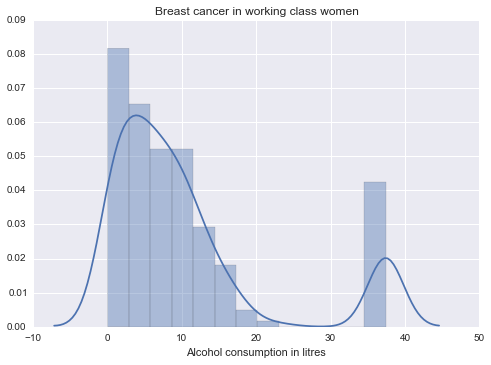

In [13]:
# Now plotting the univariate quantitative variables using the distribution plot
sub5=sub4.copy()
sns.distplot(sub5['alcconsumption'].dropna(),kde=True)

plt.xlabel('Alcohol consumption in litres')
plt.title('Breast cancer in working class women')
plt.show() # Note: Although there is no need to use the show() method for ipython notebook as %matplotlib inline does the trick but 
           #I am adding it here because matplotlib inline does not work for an IDE like Pycharm and for that i need to use plt.show

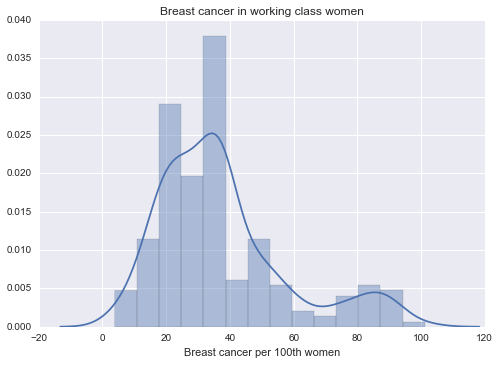

In [14]:
sns.distplot(sub5['breastcancerper100th'].dropna(),kde=True)
plt.xlabel('Breast cancer per 100th women')
plt.title('Breast cancer in working class women')
plt.show()

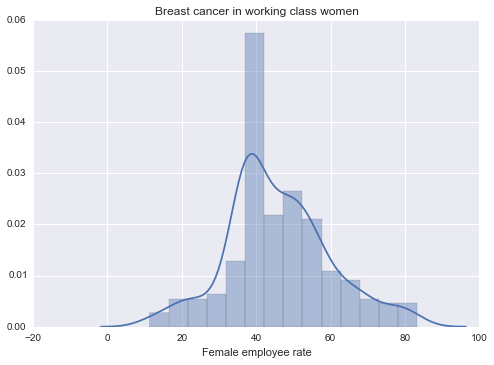

In [15]:
sns.distplot(sub5['femaleemployrate'].dropna(),kde=True)
plt.xlabel('Female employee rate')
plt.title('Breast cancer in working class women')
plt.show()

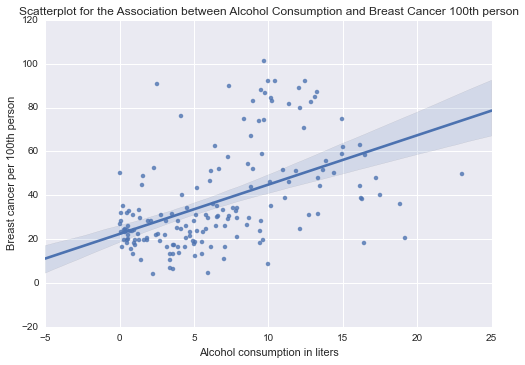

In [16]:
# using scatter plot the visulaize quantitative variable. 
# if categorical variable then use histogram
scat1= sns.regplot(x='alcconsumption', y='breastcancerper100th', data=data)
plt.xlabel('Alcohol consumption in liters')
plt.ylabel('Breast cancer per 100th person')
plt.title('Scatterplot for the Association between Alcohol Consumption and Breast Cancer 100th person')

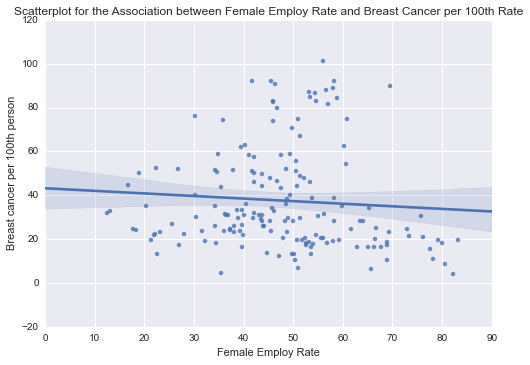

In [17]:
scat2= sns.regplot(x='femaleemployrate', y='breastcancerper100th', data=data)
plt.xlabel('Female Employ Rate')
plt.ylabel('Breast cancer per 100th person')
plt.title('Scatterplot for the Association between Female Employ Rate and Breast Cancer per 100th Rate')

## End of code!